In [1]:
!pip install kagglehub lime shap


import kagglehub
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2f793b31d9cace7bed4e6f714ad42431bdc8dfb97d720a32c1fb523409cca413
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)


100%|██████████| 149M/149M [00:00<00:00, 244MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [3]:
train_dir = path + '/Training'
test_dir = path + '/Testing'


classes = sorted(os.listdir(train_dir))
num_classes = len(classes)


img_size = (299,299)
batch_size = 32


train_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.15)
train_data = train_gen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training')
val_data = train_gen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation')


test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data = test_gen.flow_from_directory(test_dir, target_size=img_size, batch_size=32, class_mode='categorical', shuffle=False)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
base = InceptionV3(include_top=False, weights='imagenet', input_shape=(299,299,3))
base.trainable = False
x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.4)(x)
out = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base.input, outputs=out)
model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
checkpoint = ModelCheckpoint('model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=4, factor=0.3)


history1 = model.fit(train_data, validation_data=val_data, epochs=20, callbacks=[checkpoint, early, lr_reduce])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5995 - loss: 0.9602

152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 321ms/step - accuracy: 0.6004 - loss: 0.9583 - val_accuracy: 0.7474 - val_loss: 0.6772 - learning_rate: 0.0010
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8366 - loss: 0.4322

152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - accuracy: 0.8367 - loss: 0.4320 - val_accuracy: 0.8152 - val_loss: 0.4941 - learning_rate: 0.0010
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8845 - loss: 0.3451

152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - accuracy: 0.8844 - loss: 0.3451 - val_accuracy: 0.8444 - val_loss: 0.4375 - learning_rate: 0.0010
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - accuracy: 0.8844 - loss: 0.3196 - val_accuracy: 0.8398 - val_loss: 0.4470 - learning_rate: 0.0010
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8903 - loss: 0.3009

152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - accuracy: 0.8903 - loss: 0.3009 - val_accuracy: 0.8456 - val_loss: 0.4422 - learning_rate: 0.0010
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.9035 - loss: 0.2765 - val_accuracy: 0.8257 - val_loss: 0.4963 - learning_rate: 0.0010
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8978 - loss: 0.2768

152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 150ms/step - accuracy: 0.8979 - loss: 0.2768 - val_accuracy: 0.8655 - val_loss: 0.3832 - learning_rate: 0.0010
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.9106 - loss: 0.2510 - val_accuracy: 0.8561 - val_loss: 0.4172 - learning_rate: 0.0010
Epoch 9/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.8941 - loss: 0.2768 - val_accuracy: 0.8655 - val_loss: 0.3732 - learning_rate: 0.0010
Epoch 10/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.9037 - loss: 0.2546 - val_accuracy: 0.8550 - val_loss: 0.3784 - learning_rate: 0.0010
Epoch 11/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.9114 - loss: 0.2365 - val_accuracy: 0.8596 - val_loss: 0.3857 - learning_rate: 0.0010
Epoch 12/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.9095 - loss: 0.2354 - val_accuracy: 0.8433 - val_loss: 0.4437 - learning_rate: 0.0010
Epoch 13/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9123 - lo

152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 160ms/step - accuracy: 0.9122 - loss: 0.2295 - val_accuracy: 0.8678 - val_loss: 0.3697 - learning_rate: 0.0010
Epoch 14/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - accuracy: 0.9154 - loss: 0.2314 - val_accuracy: 0.8643 - val_loss: 0.3675 - learning_rate: 0.0010
Epoch 15/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.9246 - loss: 0.2203 - val_accuracy: 0.8620 - val_loss: 0.3525 - learning_rate: 0.0010
Epoch 16/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.9130 - loss: 0.2339 - val_accuracy: 0.8538 - val_loss: 0.4044 - learning_rate: 0.0010
Epoch 17/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.8985 - loss: 0.2534 - val_accuracy: 0.8667 - val_loss: 0.3783 - learning_rate: 0.0010
Epoch 18/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9059 - loss: 0.2293

152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 148ms/step - accuracy: 0.9060 - loss: 0.2293 - val_accuracy: 0.8702 - val_loss: 0.3600 - learning_rate: 0.0010
Epoch 19/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9217 - loss: 0.2124

152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - accuracy: 0.9217 - loss: 0.2125 - val_accuracy: 0.8819 - val_loss: 0.3228 - learning_rate: 0.0010
Epoch 20/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - accuracy: 0.9141 - loss: 0.2354 - val_accuracy: 0.8655 - val_loss: 0.3642 - learning_rate: 0.0010


In [6]:
base.trainable = True
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


history2 = model.fit(train_data, validation_data=val_data, epochs=30, callbacks=[checkpoint, early, lr_reduce])

Epoch 1/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 200s 789ms/step - accuracy: 0.7412 - loss: 0.8455 - val_accuracy: 0.7778 - val_loss: 0.5915 - learning_rate: 1.0000e-05
Epoch 2/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 445ms/step - accuracy: 0.9255 - loss: 0.2067 - val_accuracy: 0.7778 - val_loss: 0.6043 - learning_rate: 1.0000e-05
Epoch 3/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 447ms/step - accuracy: 0.9564 - loss: 0.1124 - val_accuracy: 0.8550 - val_loss: 0.3536 - learning_rate: 1.0000e-05
Epoch 4/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9714 - loss: 0.0778

152/152 ━━━━━━━━━━━━━━━━━━━━ 75s 494ms/step - accuracy: 0.9714 - loss: 0.0777 - val_accuracy: 0.9018 - val_loss: 0.2295 - learning_rate: 1.0000e-05
Epoch 5/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9890 - loss: 0.0437

152/152 ━━━━━━━━━━━━━━━━━━━━ 74s 486ms/step - accuracy: 0.9890 - loss: 0.0437 - val_accuracy: 0.9181 - val_loss: 0.2025 - learning_rate: 1.0000e-05
Epoch 6/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9897 - loss: 0.0308

152/152 ━━━━━━━━━━━━━━━━━━━━ 74s 485ms/step - accuracy: 0.9897 - loss: 0.0308 - val_accuracy: 0.9298 - val_loss: 0.1685 - learning_rate: 1.0000e-05
Epoch 7/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 448ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9251 - val_loss: 0.1925 - learning_rate: 1.0000e-05
Epoch 8/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9955 - loss: 0.0212

152/152 ━━━━━━━━━━━━━━━━━━━━ 75s 494ms/step - accuracy: 0.9955 - loss: 0.0212 - val_accuracy: 0.9368 - val_loss: 0.1647 - learning_rate: 1.0000e-05
Epoch 9/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 446ms/step - accuracy: 0.9986 - loss: 0.0106 - val_accuracy: 0.9368 - val_loss: 0.1633 - learning_rate: 1.0000e-05
Epoch 10/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 69s 456ms/step - accuracy: 0.9972 - loss: 0.0122 - val_accuracy: 0.9310 - val_loss: 0.1683 - learning_rate: 1.0000e-05
Epoch 11/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9984 - loss: 0.0084

152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 497ms/step - accuracy: 0.9984 - loss: 0.0084 - val_accuracy: 0.9404 - val_loss: 0.1508 - learning_rate: 1.0000e-05
Epoch 12/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9980 - loss: 0.0068

152/152 ━━━━━━━━━━━━━━━━━━━━ 74s 484ms/step - accuracy: 0.9980 - loss: 0.0068 - val_accuracy: 0.9415 - val_loss: 0.1508 - learning_rate: 1.0000e-05
Epoch 13/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 446ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9392 - val_loss: 0.1682 - learning_rate: 1.0000e-05
Epoch 14/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9982 - loss: 0.0062

152/152 ━━━━━━━━━━━━━━━━━━━━ 74s 486ms/step - accuracy: 0.9982 - loss: 0.0062 - val_accuracy: 0.9462 - val_loss: 0.1501 - learning_rate: 1.0000e-05
Epoch 15/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 446ms/step - accuracy: 0.9988 - loss: 0.0056 - val_accuracy: 0.9439 - val_loss: 0.1592 - learning_rate: 1.0000e-05
Epoch 16/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 444ms/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.9450 - val_loss: 0.1470 - learning_rate: 1.0000e-05
Epoch 17/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 446ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9439 - val_loss: 0.1516 - learning_rate: 1.0000e-05
Epoch 18/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 445ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9415 - val_loss: 0.1804 - learning_rate: 1.0000e-05
Epoch 19/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9990 - loss: 0.0030

152/152 ━━━━━━━━━━━━━━━━━━━━ 75s 492ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9497 - val_loss: 0.1656 - learning_rate: 1.0000e-05
Epoch 20/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 445ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9485 - val_loss: 0.1535 - learning_rate: 1.0000e-05
Epoch 21/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 445ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9485 - val_loss: 0.1503 - learning_rate: 3.0000e-06
Epoch 22/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 443ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9474 - val_loss: 0.1592 - learning_rate: 3.0000e-06
Epoch 23/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9988 - loss: 0.0032

152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 497ms/step - accuracy: 0.9988 - loss: 0.0032 - val_accuracy: 0.9509 - val_loss: 0.1554 - learning_rate: 3.0000e-06
Epoch 24/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 445ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9497 - val_loss: 0.1540 - learning_rate: 3.0000e-06
Epoch 25/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 445ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9474 - val_loss: 0.1537 - learning_rate: 9.0000e-07
Epoch 26/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 443ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9474 - val_loss: 0.1510 - learning_rate: 9.0000e-07
Epoch 27/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 446ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9474 - val_loss: 0.1513 - learning_rate: 9.0000e-07
Epoch 28/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 446ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9497 - val_loss: 0.1509 - learning_rate: 9.0000e-07
Epoch 29/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 444ms/s

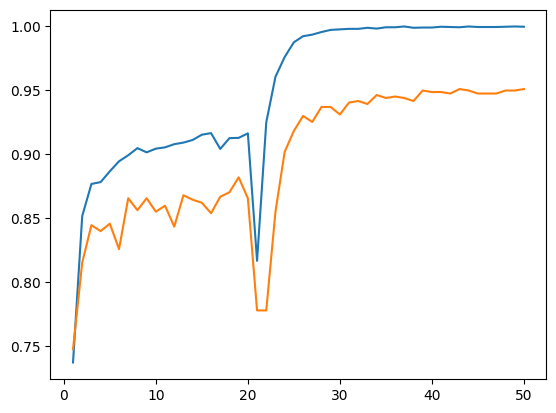

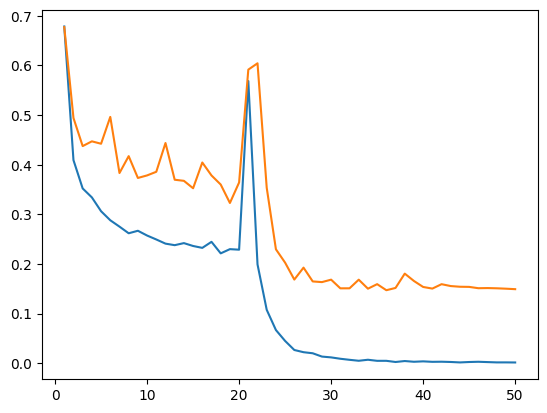

In [7]:
acc = history1.history['accuracy'] + history2.history['accuracy']
val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
loss = history1.history['loss'] + history2.history['loss']
val_loss = history1.history['val_loss'] + history2.history['val_loss']


ep = range(1, len(acc)+1)
plt.plot(ep, acc)
plt.plot(ep, val_acc)
plt.show()
plt.plot(ep, loss)
plt.plot(ep, val_loss)
plt.show()

In [8]:
pred = model.predict(test_data)
pred_labels = np.argmax(pred, axis=1)
true_labels = test_data.classes


print(classification_report(true_labels, pred_labels, target_names=classes))
print(confusion_matrix(true_labels, pred_labels))

41/41 ━━━━━━━━━━━━━━━━━━━━ 28s 417ms/step
              precision    recall  f1-score   support

      glioma       0.99      0.93      0.96       300
  meningioma       0.94      0.95      0.94       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.96      0.99      0.98       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311

[[279  17   0   4]
 [  2 291   5   8]
 [  0   1 404   0]
 [  0   2   0 298]]


In [11]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 65,364,078 (249.34 MB)

 Trainable params: 21,776,548 (83.07 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 43,553,098 (166.14 MB)

In [12]:
# RAW (UNPROCESSED) IMAGE GENERATORS
raw_datagen = ImageDataGenerator()

raw_train = raw_datagen.flow_from_directory(
    train_dir,                     # FIXED ✅
    target_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

raw_test = raw_datagen.flow_from_directory(
    test_dir,                      # FIXED ✅
    target_size=img_size,
    batch_size=batch_size,
    shuffle=True
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [13]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.15)

train_data = train_gen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='training'
)

val_data = train_gen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='validation'
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_data = test_gen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=32,
    class_mode='categorical', shuffle=False
)


Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


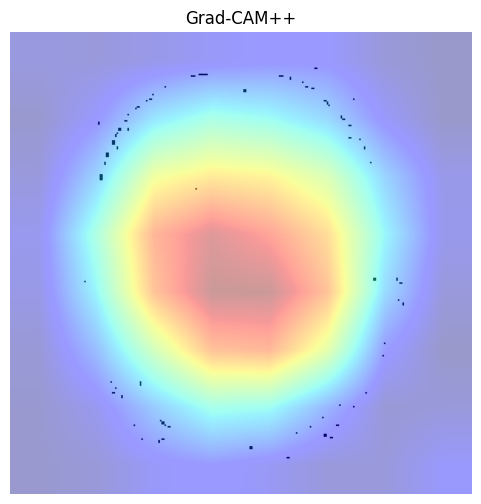

In [15]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Pick a layer name from your model
# For InceptionV3, a good layer is 'mixed10'
last_conv_layer_name = "mixed10"

# 1. Grad-CAM++ function
def gradcam_plus_plus(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions[0])]

    grads = tape.gradient(loss, conv_outputs)

    # Compute Grad-CAM++
    grads = tf.maximum(grads, 0)
    weights = tf.reduce_sum(grads, axis=(1, 2))

    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    cam = cam[0].numpy()
    cam = cv2.resize(cam, (299, 299))
    cam = (cam - cam.min()) / (cam.max() - cam.min())

    return cam

# 2. Prepare one test image
test_imgs, _ = next(raw_test)
img = test_imgs[0]
input_img = preprocess_input(img.copy()).reshape(1, 299, 299, 3)

# 3. Generate CAM
heatmap = gradcam_plus_plus(model, input_img, last_conv_layer_name)

# 4. Overlay
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.imshow(heatmap, cmap="jet", alpha=0.4)
plt.title("Grad-CAM++")
plt.axis("off")
plt.show()


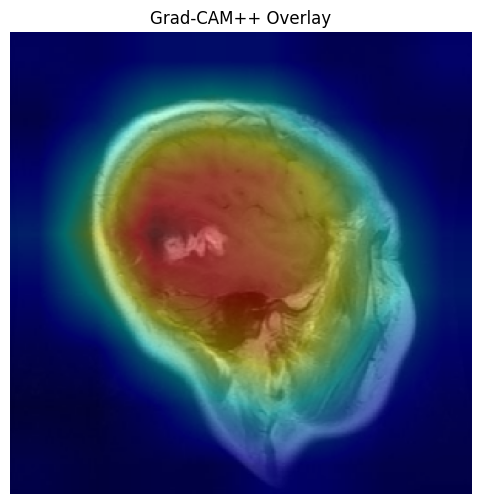

In [16]:
def show_gradcam(img_raw, heatmap):
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    overlay = cv2.addWeighted(img_raw.astype("uint8"), 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(6,6))
    plt.imshow(overlay)
    plt.axis("off")
    plt.title("Grad-CAM++ Overlay")
    plt.show()

# --- pick a raw image ---
raw_imgs, _ = next(raw_test)
img_raw = raw_imgs[0]

# preprocess for model
img_input = preprocess_input(img_raw.copy()).reshape(1, 299, 299, 3)

# compute gradcam++
heatmap = gradcam_plus_plus(model, img_input, last_conv_layer_name)

# show proper overlay
show_gradcam(img_raw, heatmap)


**Explaining image for predicted Class Index:** 2
--------------------------------------------------


  0%|          | 0/1000 [00:00<?, ?it/s]

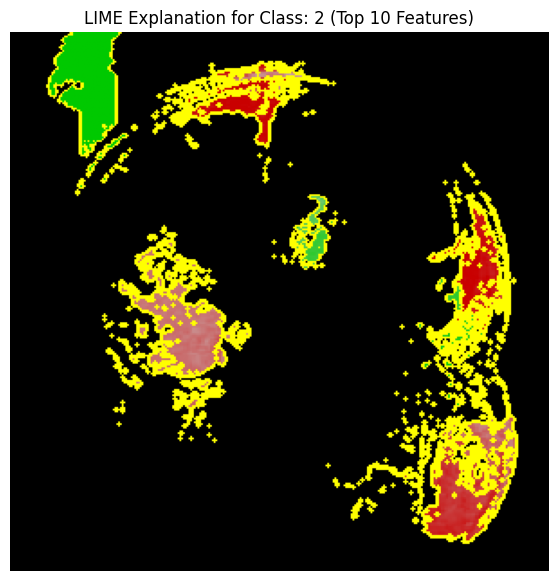

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
import warnings
warnings.filterwarnings('ignore')

# --- Assuming the following variables and functions are defined ---
# model
# preprocess_input (InceptionV3 preprocess_input function)
# raw_test (Your raw, un-preprocessed ImageDataGenerator)
img_size = (299, 299)
# -----------------------------------------------------------------

# 1. LIME-Specific Prediction Function
def lime_predict_fn(images):
    """Wrapper function to preprocess LIME's generated images before prediction."""
    # Scale to 0-255 before applying InceptionV3 preprocess_input
    processed_images = preprocess_input(images.astype(np.float32))
    return model.predict(processed_images, verbose=0)

# 2. Image Selection and Prediction
raw_imgs, _ = next(raw_test)
img_raw = raw_imgs[0]
img_input_processed = preprocess_input(img_raw.copy()).reshape(1, img_size[0], img_size[1], 3)

predictions = model.predict(img_input_processed, verbose=0)
target_label = np.argmax(predictions[0])

print(f"**Explaining image for predicted Class Index:** {target_label}")
print("-" * 50)

# 3. Run LIME Explainer
explainer_lime = lime_image.LimeImageExplainer()
exp_lime = explainer_lime.explain_instance(
    img_raw.astype('double'),
    classifier_fn=lime_predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000 # Increase this for more robust results
)

# 4. Generate and Plot LIME Visualization
# Get LIME visualization: show top 10 contributing/opposing features, hide the rest
img_lime_mask, mask_lime = exp_lime.get_image_and_mask(
    exp_lime.top_labels[0],
    positive_only=False,       # Show both contributing (red) and opposing (green)
    num_features=10,           # Show top 10 segments
    hide_rest=True             # Crucial: Hides (makes black) unselected segments
)

# Apply yellow boundary lines using mark_boundaries
plt.figure(figsize=(7, 7))
# Divide by 255.0 for correct plotting range [0, 1]
plt.imshow(mark_boundaries(img_lime_mask / 255.0, mask_lime))
plt.title(f"LIME Explanation for Class: {target_label} (Top 10 Features)")
plt.axis('off')
plt.show()

**Using Fixed Image Path:** /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/pituitary/Tr-pi_0532.jpg
--------------------------------------------------


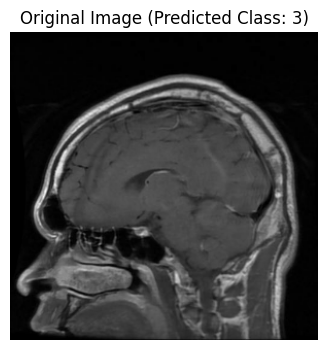

--- Generating XAI Explanations for Class 3 ---
--------------------------------------------------
SHAP OK: Indexing list[0][0] used (size=1 list).


  0%|          | 0/1000 [00:00<?, ?it/s]

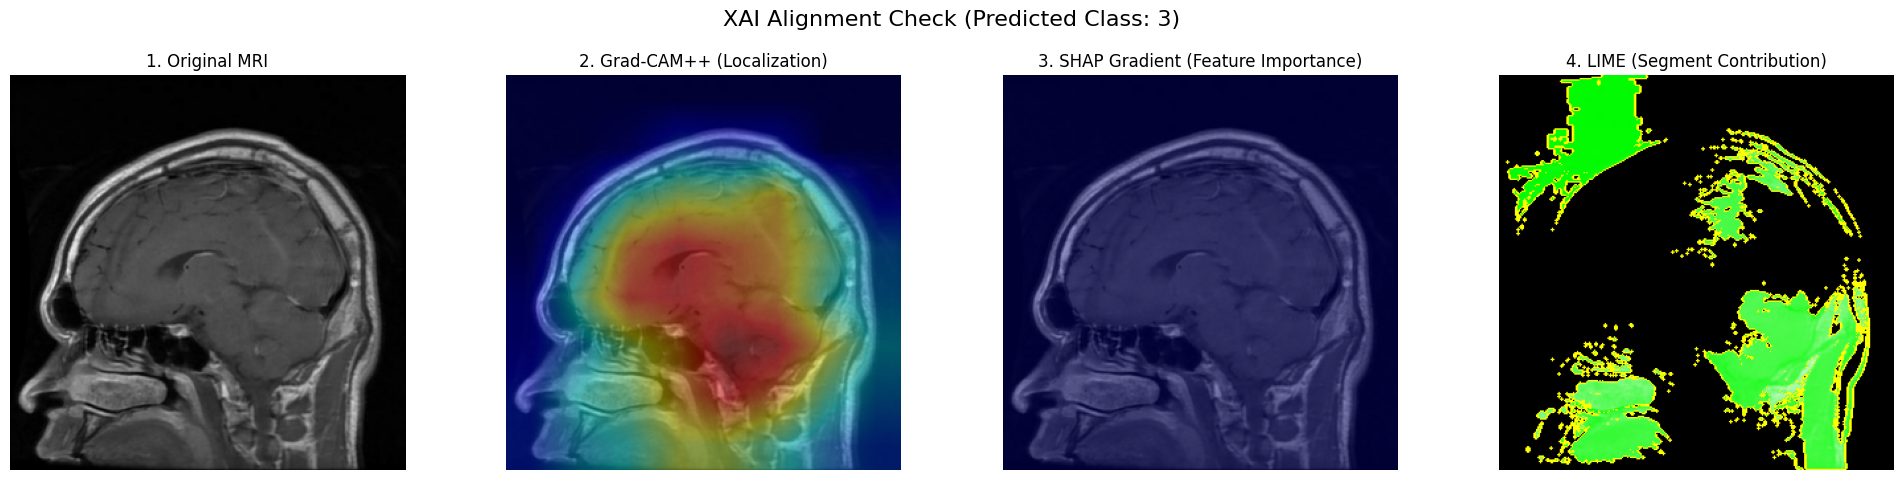

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import shap
from lime import lime_image
from skimage.segmentation import mark_boundaries
import warnings
import os
warnings.filterwarnings('ignore')

# --- CONFIGURATION & PATH FIX ---
# NOTE: This path is based on the standard Kaggle dataset structure.
# You must adjust the '/root/.cache/...' part if your notebook environment is different.
base_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"
if not os.path.exists(base_path):
    # Fallback/alternative path assumption if the cached path doesn't exist
    print("Warning: Default cache path not found. Please ensure 'base_path' is correct.")
    # Assuming the extracted data is still reachable
    base_path = '/kaggle/input/brain-tumor-mri-dataset'

# PATH TO A KNOWN PITUITARY TUMOR IMAGE
example_img_path = base_path + "/Training/pituitary/Tr-pi_0532.jpg"

print(f"**Using Fixed Image Path:** {example_img_path}")
print("-" * 50)

# --- Define Utility Functions (Necessary for execution) ---
last_conv_layer_name = "mixed10"
img_size = (299, 299)
# Assuming model, preprocess_input, and raw_test are still defined in the environment.

def gradcam_plus_plus(model, img_array, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        target_class_idx = np.argmax(predictions[0])
        loss = predictions[:, target_class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    cam = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    cam = cam.numpy()
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, img_size)
    cam = cam / (cam.max() + 1e-8)
    return cam

def get_overlay_image(img_raw, heatmap, alpha=0.4):
    if img_raw.dtype != np.uint8:
        if img_raw.max() <= 1.0 + 1e-6:
            img_raw = (img_raw * 255).astype(np.uint8)
        else:
            img_raw = img_raw.astype(np.uint8)

    # Ensure img_raw has 3 channels
    if len(img_raw.shape) == 2 or img_raw.shape[2] == 1:
        img_raw_colored = cv2.cvtColor(img_raw, cv2.COLOR_GRAY2BGR)
    elif img_raw.shape[2] == 3:
        img_raw_colored = cv2.cvtColor(img_raw, cv2.COLOR_RGB2BGR)
    else:
        raise ValueError("img_raw has an unexpected number of channels.")

    # Apply colormap
    heatmap_jet = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Resize heatmap to match img_raw dimensions if necessary
    if heatmap_jet.shape[:2] != img_raw_colored.shape[:2]:
        heatmap_jet = cv2.resize(heatmap_jet, (img_raw_colored.shape[1], img_raw_colored.shape[0]))

    # Blend
    overlay = cv2.addWeighted(img_raw_colored, 1 - alpha, heatmap_jet, alpha, 0)
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
    return overlay_rgb


def lime_predict_fn(images):
    processed_images = preprocess_input(images.astype(np.float32))
    return model.predict(processed_images, verbose=0)

# --- 2. SINGLE IMAGE LOADING (The definitive fix for alignment) ---

# Use the fixed image path for loading
# We use tf.io.read_file for robust loading, then resize and convert to numpy.
img_tensor = tf.io.read_file(example_img_path)
img_tensor = tf.image.decode_jpeg(img_tensor, channels=3)
img_tensor = tf.image.resize(img_tensor, img_size)
img_raw = img_tensor.numpy().astype(np.uint8)

# Preprocess for model
img_input_processed = preprocess_input(img_raw.copy()).reshape(1, img_size[0], img_size[1], 3)

predictions = model.predict(img_input_processed, verbose=0)
target_label = np.argmax(predictions[0])


# --- Display the Original Image ---
plt.figure(figsize=(4, 4))
plt.imshow(img_raw)
plt.title(f"Original Image (Predicted Class: {target_label})")
plt.axis('off')
plt.show()

print(f"--- Generating XAI Explanations for Class {target_label} ---")
print("-" * 50)


# --- 3. Generate Grad-CAM++ Explanation ---
heatmap_gradcam = gradcam_plus_plus(model, img_input_processed, last_conv_layer_name)
img_gradcam_overlay = get_overlay_image(img_raw, heatmap_gradcam, alpha=0.4)


# --- 4. Generate SHAP Gradient Explanation (FIXED INDEXING) ---
background_shap = img_input_processed[:1]
explainer_shap = shap.GradientExplainer(model, background_shap)

shap_values = explainer_shap.shap_values(img_input_processed)

# Robust Indexing
if len(shap_values) == 1:
    shap_image = shap_values[0][0]
    print("SHAP OK: Indexing list[0][0] used (size=1 list).")
elif len(shap_values) > target_label:
    shap_image = shap_values[target_label][0]
    print(f"SHAP OK: Indexing list[{target_label}][0] used.")
else:
    # Fallback
    print(f"SHAP Error: Using list[0][0] as fallback.")
    shap_image = shap_values[0][0]

# Convert to heatmap
heatmap_shap = np.sum(np.abs(shap_image), axis=-1)
heatmap_shap /= (np.max(heatmap_shap) + 1e-8)
img_shap_overlay = get_overlay_image(img_raw, heatmap_shap, alpha=0.4)


# --- 5. Generate LIME Explanation ---
explainer_lime = lime_image.LimeImageExplainer()
exp_lime = explainer_lime.explain_instance(
    img_raw.astype('double'),
    classifier_fn=lime_predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

img_lime_mask, mask_lime = exp_lime.get_image_and_mask(
    exp_lime.top_labels[0],
    positive_only=False,
    num_features=10,
    hide_rest=True
)
img_lime_final = mark_boundaries(img_lime_mask / 255.0, mask_lime)
img_lime_final = (img_lime_final * 255).astype(np.uint8)


# --- 6. Side-by-Side Plotting ---
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle(f"XAI Alignment Check (Predicted Class: {target_label})", fontsize=16)

# 1. Original Image
axes[0].imshow(img_raw)
axes[0].set_title("1. Original MRI")
axes[0].axis('off')

# 2. Grad-CAM++
axes[1].imshow(img_gradcam_overlay)
axes[1].set_title("2. Grad-CAM++ (Localization)")
axes[1].axis('off')

# 3. SHAP
axes[2].imshow(img_shap_overlay)
axes[2].set_title("3. SHAP Gradient (Feature Importance)")
axes[2].axis('off')

# 4. LIME
axes[3].imshow(img_lime_final)
axes[3].set_title("4. LIME (Segment Contribution)")
axes[3].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Using Fixed Image Path:** /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/pituitary/Tr-pi_0532.jpg
--------------------------------------------------


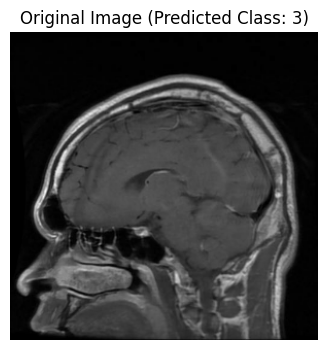

--- Generating XAI Explanations for Class 3 ---
--------------------------------------------------
SHAP OK: Applied 85th percentile thresholding for focus.


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME OK: Showing only the top 5 positive features.


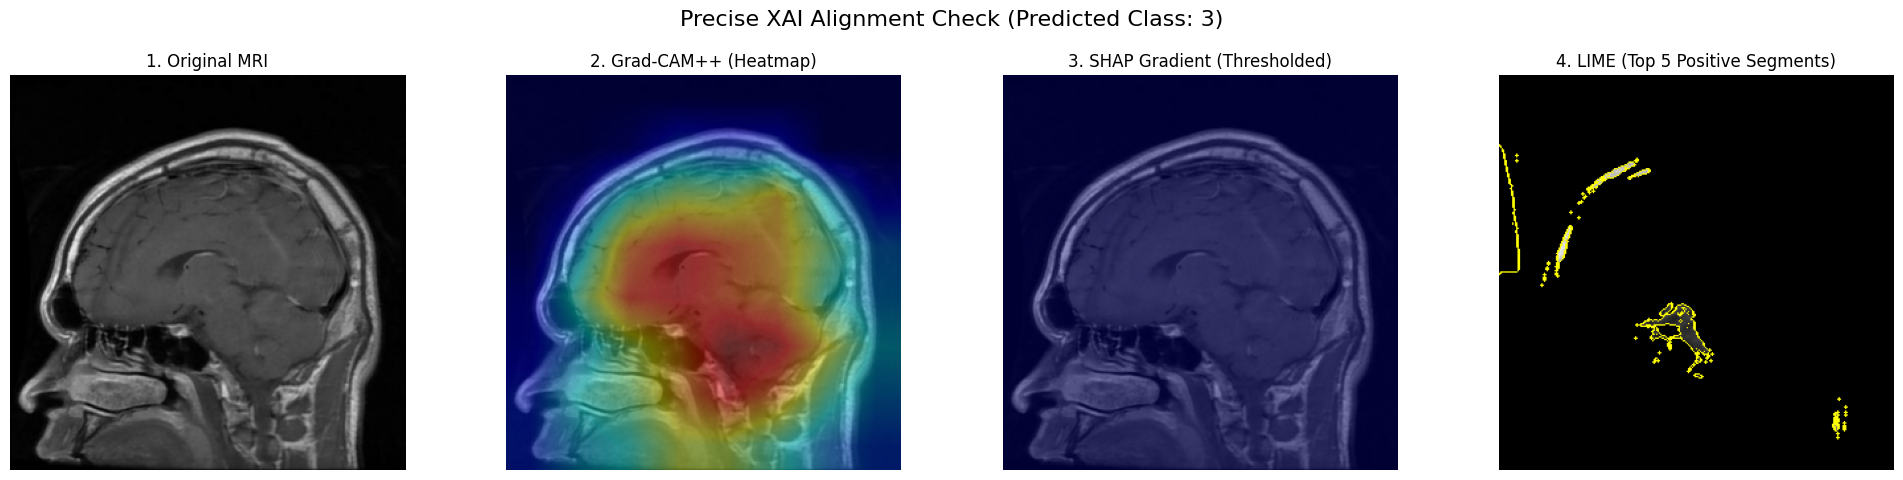

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import shap
from lime import lime_image
from skimage.segmentation import mark_boundaries
import warnings
import os
warnings.filterwarnings('ignore')

# --- CONFIGURATION & PATH FIX ---
# NOTE: Using your defined path
base_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"
if not os.path.exists(base_path):
    print("Warning: Default cache path not found. Ensure 'base_path' is correct.")
    base_path = '/kaggle/input/brain-tumor-mri-dataset'

example_img_path = base_path + "/Training/pituitary/Tr-pi_0532.jpg"

print(f"**Using Fixed Image Path:** {example_img_path}")
print("-" * 50)

# --- Define Utility Functions ---
last_conv_layer_name = "mixed10"
img_size = (299, 299)

def gradcam_plus_plus(model, img_array, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        target_class_idx = np.argmax(predictions[0])
        loss = predictions[:, target_class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    cam = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    cam = cam.numpy()
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, img_size)
    cam = cam / (cam.max() + 1e-8)
    return cam

def get_overlay_image(img_raw, heatmap, alpha=0.4):
    if img_raw.dtype != np.uint8:
        if img_raw.max() <= 1.0 + 1e-6:
             img_raw = (img_raw * 255).astype(np.uint8)
        else:
             img_raw = img_raw.astype(np.uint8)

    if len(img_raw.shape) == 2 or img_raw.shape[2] == 1:
        img_raw_colored = cv2.cvtColor(img_raw, cv2.COLOR_GRAY2BGR)
    elif img_raw.shape[2] == 3:
        img_raw_colored = cv2.cvtColor(img_raw, cv2.COLOR_RGB2BGR)
    else:
        raise ValueError("img_raw has an unexpected number of channels.")

    heatmap_jet = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    if heatmap_jet.shape[:2] != img_raw_colored.shape[:2]:
        heatmap_jet = cv2.resize(heatmap_jet, (img_raw_colored.shape[1], img_raw_colored.shape[0]))

    overlay = cv2.addWeighted(img_raw_colored, 1 - alpha, heatmap_jet, alpha, 0)
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
    return overlay_rgb

def lime_predict_fn(images):
    processed_images = preprocess_input(images.astype(np.float32))
    return model.predict(processed_images, verbose=0)

# --- 2. SINGLE IMAGE LOADING ---
img_tensor = tf.io.read_file(example_img_path)
img_tensor = tf.image.decode_jpeg(img_tensor, channels=3)
img_tensor = tf.image.resize(img_tensor, img_size)
img_raw = img_tensor.numpy().astype(np.uint8)

img_input_processed = preprocess_input(img_raw.copy()).reshape(1, img_size[0], img_size[1], 3)

predictions = model.predict(img_input_processed, verbose=0)
target_label = np.argmax(predictions[0])


# --- Display the Original Image ---
plt.figure(figsize=(4, 4))
plt.imshow(img_raw)
plt.title(f"Original Image (Predicted Class: {target_label})")
plt.axis('off')
plt.show()

print(f"--- Generating XAI Explanations for Class {target_label} ---")
print("-" * 50)


# --- 3. Generate Grad-CAM++ Explanation ---
heatmap_gradcam = gradcam_plus_plus(model, img_input_processed, last_conv_layer_name)
img_gradcam_overlay = get_overlay_image(img_raw, heatmap_gradcam, alpha=0.4)


# --- 4. Generate SHAP Gradient Explanation (SHARPENED) ---
background_shap = img_input_processed[:1]
explainer_shap = shap.GradientExplainer(model, background_shap)
shap_values = explainer_shap.shap_values(img_input_processed)

# Robust Indexing
if len(shap_values) == 1:
    shap_image = shap_values[0][0]
elif len(shap_values) > target_label:
    shap_image = shap_values[target_label][0]
else:
    shap_image = shap_values[0][0]

# Convert to heatmap
heatmap_shap = np.sum(np.abs(shap_image), axis=-1)

# **CRITICAL SHARPENING STEP:** Zero out low-importance areas to focus on the tumor.
threshold = np.percentile(heatmap_shap, 85) # Use 85th percentile as the cutoff
heatmap_shap[heatmap_shap < threshold] = 0

heatmap_shap /= (np.max(heatmap_shap) + 1e-8)
img_shap_overlay = get_overlay_image(img_raw, heatmap_shap, alpha=0.4)
print(f"SHAP OK: Applied 85th percentile thresholding for focus.")


# --- 5. Generate LIME Explanation (FOCUSED) ---
explainer_lime = lime_image.LimeImageExplainer()
exp_lime = explainer_lime.explain_instance(
    img_raw.astype('double'),
    classifier_fn=lime_predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000 # Keep samples high for stability
)

img_lime_mask, mask_lime = exp_lime.get_image_and_mask(
    exp_lime.top_labels[0],
    positive_only=True, # ***CRITICAL: Only show the positive (contributing) segments***
    num_features=5,    # ***CRITICAL: Show only the top 5 most important segments***
    hide_rest=True
)
img_lime_final = mark_boundaries(img_lime_mask / 255.0, mask_lime)
img_lime_final = (img_lime_final * 255).astype(np.uint8)
print("LIME OK: Showing only the top 5 positive features.")


# --- 6. Side-by-Side Plotting ---
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle(f"Precise XAI Alignment Check (Predicted Class: {target_label})", fontsize=16)

# 1. Original Image
axes[0].imshow(img_raw)
axes[0].set_title("1. Original MRI")
axes[0].axis('off')

# 2. Grad-CAM++
axes[1].imshow(img_gradcam_overlay)
axes[1].set_title("2. Grad-CAM++ (Heatmap)")
axes[1].axis('off')

# 3. SHAP
axes[2].imshow(img_shap_overlay)
axes[2].set_title("3. SHAP Gradient (Thresholded)")
axes[2].axis('off')

# 4. LIME
axes[3].imshow(img_lime_final)
axes[3].set_title("4. LIME (Top 5 Positive Segments)")
axes[3].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Using Fixed Image Path:** /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0010.jpg
--------------------------------------------------


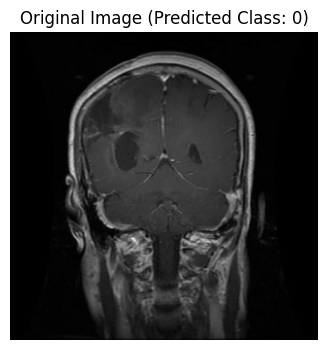

--- Generating XAI Explanations for Class 0 ---
--------------------------------------------------
SHAP OK: Applied 85th percentile thresholding for focus.


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME OK: Showing only the top 5 positive features.


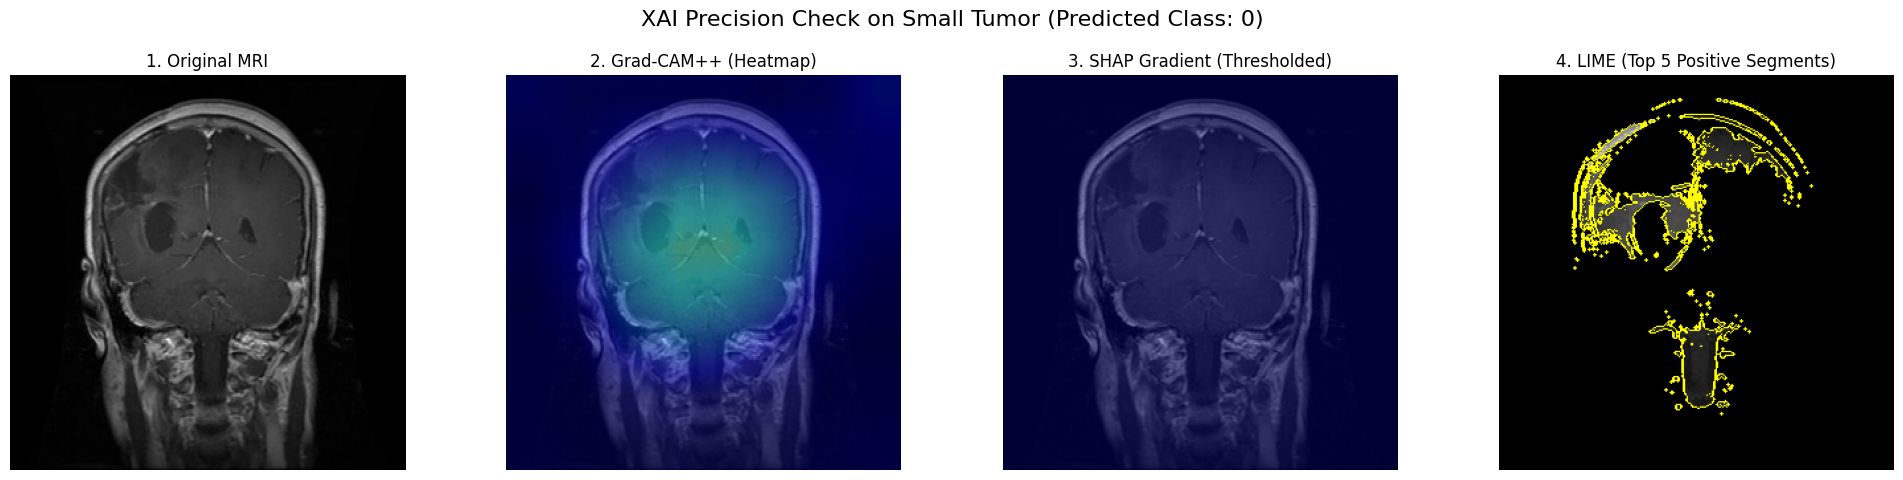

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import shap
from lime import lime_image
from skimage.segmentation import mark_boundaries
import warnings
import os
warnings.filterwarnings('ignore')

# --- CONFIGURATION & PATH FIX ---
# NOTE: Using a path pointing to a Glioma for a smaller/more diffuse tumor example.
base_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"
if not os.path.exists(base_path):
    print("Warning: Default cache path not found. Ensure 'base_path' is correct.")
    base_path = '/kaggle/input/brain-tumor-mri-dataset'

# PATH TO A NEW IMAGE (Glioma often presents smaller/more localized)
example_img_path = base_path + "/Training/glioma/Tr-gl_0010.jpg" # Changed to a Glioma example

print(f"**Using Fixed Image Path:** {example_img_path}")
print("-" * 50)

# --- Define Utility Functions (Kept robust for execution) ---
last_conv_layer_name = "mixed10"
img_size = (299, 299)
# Assuming model, preprocess_input are still defined.

def gradcam_plus_plus(model, img_array, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        target_class_idx = np.argmax(predictions[0])
        loss = predictions[:, target_class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    cam = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    cam = cam.numpy()
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, img_size)
    cam = cam / (cam.max() + 1e-8)
    return cam

def get_overlay_image(img_raw, heatmap, alpha=0.4):
    if img_raw.dtype != np.uint8:
        if img_raw.max() <= 1.0 + 1e-6:
             img_raw = (img_raw * 255).astype(np.uint8)
        else:
             img_raw = img_raw.astype(np.uint8)

    if len(img_raw.shape) == 2 or img_raw.shape[2] == 1:
        img_raw_colored = cv2.cvtColor(img_raw, cv2.COLOR_GRAY2BGR)
    elif img_raw.shape[2] == 3:
        img_raw_colored = cv2.cvtColor(img_raw, cv2.COLOR_RGB2BGR)
    else:
        raise ValueError("img_raw has an unexpected number of channels.")

    heatmap_jet = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    if heatmap_jet.shape[:2] != img_raw_colored.shape[:2]:
        heatmap_jet = cv2.resize(heatmap_jet, (img_raw_colored.shape[1], img_raw_colored.shape[0]))

    overlay = cv2.addWeighted(img_raw_colored, 1 - alpha, heatmap_jet, alpha, 0)
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
    return overlay_rgb

def lime_predict_fn(images):
    processed_images = preprocess_input(images.astype(np.float32))
    return model.predict(processed_images, verbose=0)

# --- 2. SINGLE IMAGE LOADING (The definitive fix for alignment) ---
img_tensor = tf.io.read_file(example_img_path)
img_tensor = tf.image.decode_jpeg(img_tensor, channels=3)
img_tensor = tf.image.resize(img_tensor, img_size)
img_raw = img_tensor.numpy().astype(np.uint8)

img_input_processed = preprocess_input(img_raw.copy()).reshape(1, img_size[0], img_size[1], 3)

predictions = model.predict(img_input_processed, verbose=0)
target_label = np.argmax(predictions[0])


# --- Display the Original Image ---
plt.figure(figsize=(4, 4))
plt.imshow(img_raw)
plt.title(f"Original Image (Predicted Class: {target_label})")
plt.axis('off')
plt.show()

print(f"--- Generating XAI Explanations for Class {target_label} ---")
print("-" * 50)


# --- 3. Generate Grad-CAM++ Explanation ---
heatmap_gradcam = gradcam_plus_plus(model, img_input_processed, last_conv_layer_name)
img_gradcam_overlay = get_overlay_image(img_raw, heatmap_gradcam, alpha=0.4)


# --- 4. Generate SHAP Gradient Explanation (SHARPENED) ---
background_shap = img_input_processed[:1]
explainer_shap = shap.GradientExplainer(model, background_shap)

shap_values = explainer_shap.shap_values(img_input_processed)

# Robust Indexing
if len(shap_values) == 1:
    shap_image = shap_values[0][0]
elif len(shap_values) > target_label:
    shap_image = shap_values[target_label][0]
else:
    shap_image = shap_values[0][0]

# Convert to heatmap
heatmap_shap = np.sum(np.abs(shap_image), axis=-1)

# CRITICAL SHARPENING STEP: Zero out low-importance areas
threshold = np.percentile(heatmap_shap, 85)
heatmap_shap[heatmap_shap < threshold] = 0

heatmap_shap /= (np.max(heatmap_shap) + 1e-8)
img_shap_overlay = get_overlay_image(img_raw, heatmap_shap, alpha=0.4)
print(f"SHAP OK: Applied 85th percentile thresholding for focus.")


# --- 5. Generate LIME Explanation (FOCUSED) ---
explainer_lime = lime_image.LimeImageExplainer()
exp_lime = explainer_lime.explain_instance(
    img_raw.astype('double'),
    classifier_fn=lime_predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

img_lime_mask, mask_lime = exp_lime.get_image_and_mask(
    exp_lime.top_labels[0],
    positive_only=True, # Only show the positive (contributing) segments
    num_features=5,    # Show only the top 5 most important segments
    hide_rest=True
)
img_lime_final = mark_boundaries(img_lime_mask / 255.0, mask_lime)
img_lime_final = (img_lime_final * 255).astype(np.uint8)
print("LIME OK: Showing only the top 5 positive features.")


# --- 6. Side-by-Side Plotting ---
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle(f"XAI Precision Check on Small Tumor (Predicted Class: {target_label})", fontsize=16)

# 1. Original Image
axes[0].imshow(img_raw)
axes[0].set_title("1. Original MRI")
axes[0].axis('off')

# 2. Grad-CAM++
axes[1].imshow(img_gradcam_overlay)
axes[1].set_title("2. Grad-CAM++ (Heatmap)")
axes[1].axis('off')

# 3. SHAP
axes[2].imshow(img_shap_overlay)
axes[2].set_title("3. SHAP Gradient (Thresholded)")
axes[2].axis('off')

# 4. LIME
axes[3].imshow(img_lime_final)
axes[3].set_title("4. LIME (Top 5 Positive Segments)")
axes[3].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Using Fixed Image Path:** /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0010.jpg
--------------------------------------------------


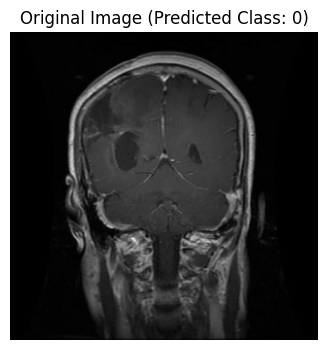

--- Generating XAI Explanations for Class 0 ---
--------------------------------------------------
SHAP OK: Applied 65th percentile thresholding for better small tumor capture.


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME OK: Showing only the top 15 positive features.


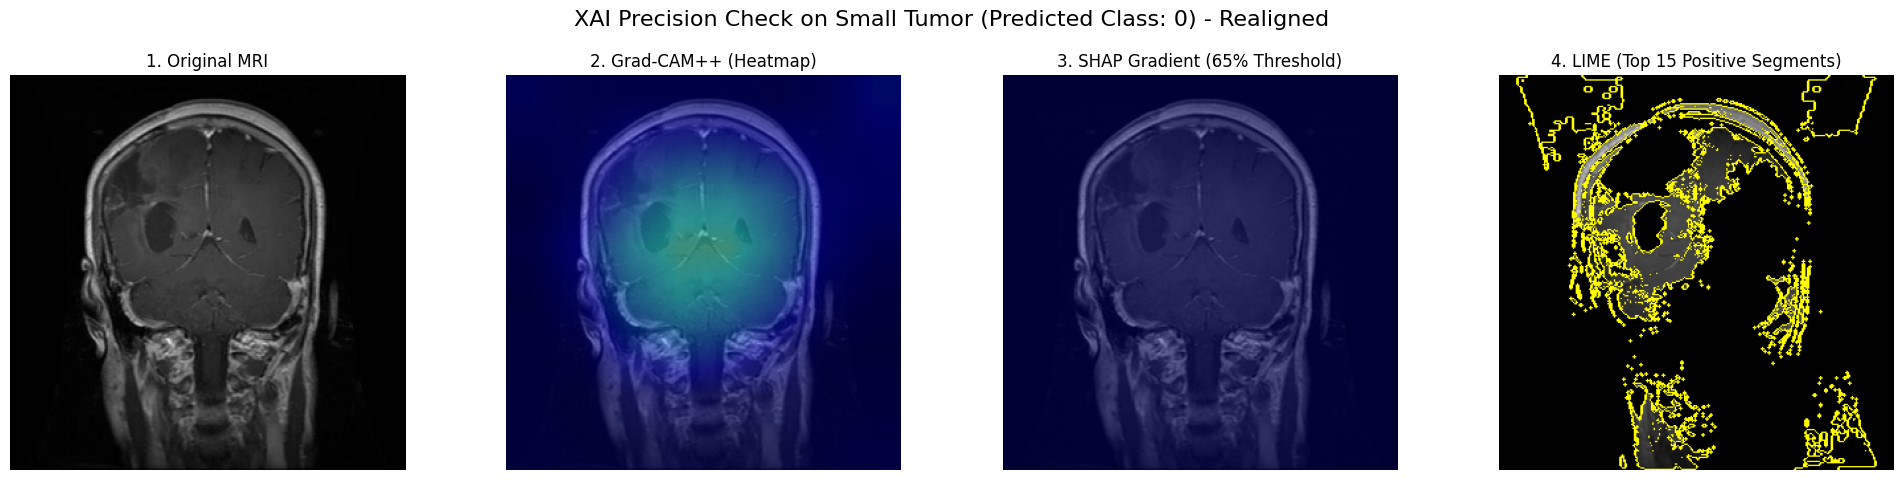

In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import shap
from lime import lime_image
from skimage.segmentation import mark_boundaries
import warnings
import os
warnings.filterwarnings('ignore')

# --- CONFIGURATION & PATH FIX ---
# NOTE: Using the same Glioma example path
base_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"
if not os.path.exists(base_path):
    print("Warning: Default cache path not found. Ensure 'base_path' is correct.")
    base_path = '/kaggle/input/brain-tumor-mri-dataset'

# PATH TO GLIOMA EXAMPLE
example_img_path = base_path + "/Training/glioma/Tr-gl_0010.jpg"

print(f"**Using Fixed Image Path:** {example_img_path}")
print("-" * 50)

# --- Define Utility Functions (Kept robust) ---
last_conv_layer_name = "mixed10"
img_size = (299, 299)
# Assuming model, preprocess_input are still defined.

def gradcam_plus_plus(model, img_array, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        target_class_idx = np.argmax(predictions[0])
        loss = predictions[:, target_class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    cam = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    cam = cam.numpy()
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, img_size)
    cam = cam / (cam.max() + 1e-8)
    return cam

def get_overlay_image(img_raw, heatmap, alpha=0.4):
    if img_raw.dtype != np.uint8:
        if img_raw.max() <= 1.0 + 1e-6:
             img_raw = (img_raw * 255).astype(np.uint8)
        else:
             img_raw = img_raw.astype(np.uint8)

    if len(img_raw.shape) == 2 or img_raw.shape[2] == 1:
        img_raw_colored = cv2.cvtColor(img_raw, cv2.COLOR_GRAY2BGR)
    elif img_raw.shape[2] == 3:
        img_raw_colored = cv2.cvtColor(img_raw, cv2.COLOR_RGB2BGR)
    else:
        raise ValueError("img_raw has an unexpected number of channels.")

    heatmap_jet = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    if heatmap_jet.shape[:2] != img_raw_colored.shape[:2]:
        heatmap_jet = cv2.resize(heatmap_jet, (img_raw_colored.shape[1], img_raw_colored.shape[0]))

    overlay = cv2.addWeighted(img_raw_colored, 1 - alpha, heatmap_jet, alpha, 0)
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
    return overlay_rgb

def lime_predict_fn(images):
    processed_images = preprocess_input(images.astype(np.float32))
    return model.predict(processed_images, verbose=0)

# --- 2. SINGLE IMAGE LOADING ---
img_tensor = tf.io.read_file(example_img_path)
img_tensor = tf.image.decode_jpeg(img_tensor, channels=3)
img_tensor = tf.image.resize(img_tensor, img_size)
img_raw = img_tensor.numpy().astype(np.uint8)

img_input_processed = preprocess_input(img_raw.copy()).reshape(1, img_size[0], img_size[1], 3)

predictions = model.predict(img_input_processed, verbose=0)
target_label = np.argmax(predictions[0])


# --- Display the Original Image ---
plt.figure(figsize=(4, 4))
plt.imshow(img_raw)
plt.title(f"Original Image (Predicted Class: {target_label})")
plt.axis('off')
plt.show()

print(f"--- Generating XAI Explanations for Class {target_label} ---")
print("-" * 50)


# --- 3. Generate Grad-CAM++ Explanation ---
heatmap_gradcam = gradcam_plus_plus(model, img_input_processed, last_conv_layer_name)
img_gradcam_overlay = get_overlay_image(img_raw, heatmap_gradcam, alpha=0.4)


# --- 4. Generate SHAP Gradient Explanation (LOOSENED THRESHOLD) ---
background_shap = img_input_processed[:1]
explainer_shap = shap.GradientExplainer(model, background_shap)
shap_values = explainer_shap.shap_values(img_input_processed)

# Robust Indexing
if len(shap_values) == 1:
    shap_image = shap_values[0][0]
elif len(shap_values) > target_label:
    shap_image = shap_values[target_label][0]
else:
    shap_image = shap_values[0][0]

# Convert to heatmap
heatmap_shap = np.sum(np.abs(shap_image), axis=-1)

# CRITICAL SHARPENING STEP: Loosen threshold to 65th percentile
threshold = np.percentile(heatmap_shap, 65) # Lowered from 85 to capture subtle tumor
heatmap_shap[heatmap_shap < threshold] = 0

heatmap_shap /= (np.max(heatmap_shap) + 1e-8)
img_shap_overlay = get_overlay_image(img_raw, heatmap_shap, alpha=0.4)
print(f"SHAP OK: Applied 65th percentile thresholding for better small tumor capture.")


# --- 5. Generate LIME Explanation (MORE FEATURES) ---
explainer_lime = lime_image.LimeImageExplainer()
exp_lime = explainer_lime.explain_instance(
    img_raw.astype('double'),
    classifier_fn=lime_predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

img_lime_mask, mask_lime = exp_lime.get_image_and_mask(
    exp_lime.top_labels[0],
    positive_only=True, # Only show the positive (contributing) segments
    num_features=15,    # Increased from 5 to 15 to capture diffuse/small signal
    hide_rest=True
)
img_lime_final = mark_boundaries(img_lime_mask / 255.0, mask_lime)
img_lime_final = (img_lime_final * 255).astype(np.uint8)
print("LIME OK: Showing only the top 15 positive features.")


# --- 6. Side-by-Side Plotting ---
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle(f"XAI Precision Check on Small Tumor (Predicted Class: {target_label}) - Realigned", fontsize=16)

# 1. Original Image
axes[0].imshow(img_raw)
axes[0].set_title("1. Original MRI")
axes[0].axis('off')

# 2. Grad-CAM++
axes[1].imshow(img_gradcam_overlay)
axes[1].set_title("2. Grad-CAM++ (Heatmap)")
axes[1].axis('off')

# 3. SHAP
axes[2].imshow(img_shap_overlay)
axes[2].set_title("3. SHAP Gradient (65% Threshold)")
axes[2].axis('off')

# 4. LIME
axes[3].imshow(img_lime_final)
axes[3].set_title("4. LIME (Top 15 Positive Segments)")
axes[3].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()